# STOR 320: Introduction to Data Science
## Spring 2025
## EDA Group 2 

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [51]:
covid_df = pd.read_csv('final_dataset.csv')
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023 entries, 0 to 2022
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            2023 non-null   object 
 1   daily_deaths                    2023 non-null   int64  
 2   daily_increase_percent          2023 non-null   int64  
 3   country                         2023 non-null   object 
 4   user_created                    2023 non-null   object 
 5   user_followers                  2023 non-null   int64  
 6   user_verified                   2023 non-null   bool   
 7   source                          2023 non-null   object 
 8   is_retweet                      2023 non-null   bool   
 9   text_sentiment                  2023 non-null   int64  
 10  Season                          2023 non-null   object 
 11  user_since_days                 2023 non-null   int64  
 12  total_vaccinations_per_hundred  20

## Creator: Arya Gavande

### Q1: Are verified users more likely to tweet negatively or positively about COVID-19 deaths?

                user_verified
text_sentiment               
-1                        312
 0                        758
 1                        953


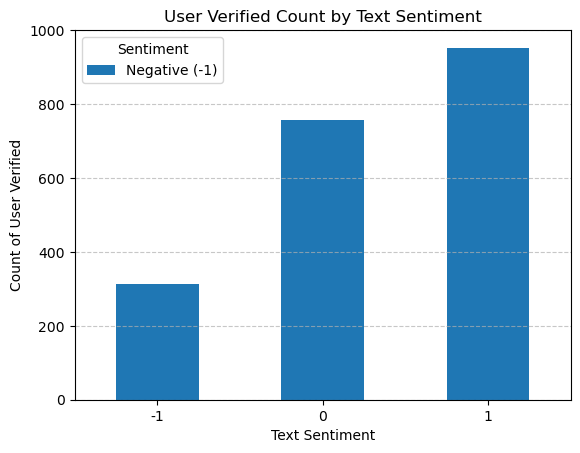

In [55]:
# Code here for Q1
q1 = covid_df.groupby('text_sentiment').agg('count')
q1 = q1[['user_verified']]
print(q1)
q1.plot(kind='bar')
# map
plt.title('User Verified Count by Text Sentiment')
plt.xlabel('Text Sentiment')
plt.ylabel('Count of User Verified')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
#to add a label
plt.legend(title='Sentiment', labels=['Negative (-1)', 'Neutral (0)', 'Positive (1)'])
plt.show()

### Q2: Is there a correlation between daily COVID-19 deaths and the sentiment of tweets in different countries?

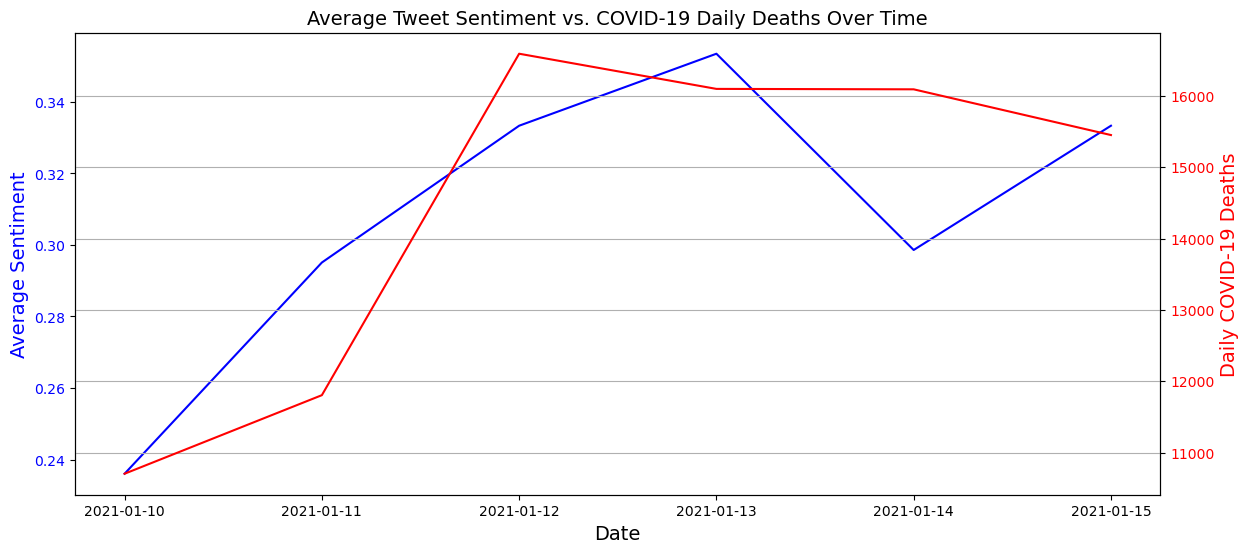

In [58]:
# Code here for Q2
q2 = covid_df.groupby('Date').agg({'text_sentiment': 'mean',
                                   'daily_deaths': 'mean'}).reset_index()

fig, ax1 = plt.subplots(figsize=(14, 6))

ax1.plot(q2['Date'], q2['text_sentiment'], 
         color='blue', label='Average Sentiment')
ax1.set_xlabel('Date',fontsize = 14)
ax1.set_ylabel('Average Sentiment', color='blue',fontsize = 14)
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()

ax2.plot(q2['Date'], q2['daily_deaths'], 
         color='red', label='Daily Deaths')
ax2.set_ylabel('Daily COVID-19 Deaths', 
               color='red',fontsize = 14)
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Average Tweet Sentiment vs. COVID-19 Daily Deaths Over Time',
          fontsize = 14)
plt.grid(True)

plt.show()

## Interpreter: Ezi Ilabor

### Q1: Which vaccine combination (e.g., mRNA vs. Viral Vector) was most effective in reducing COVID-19 deaths?

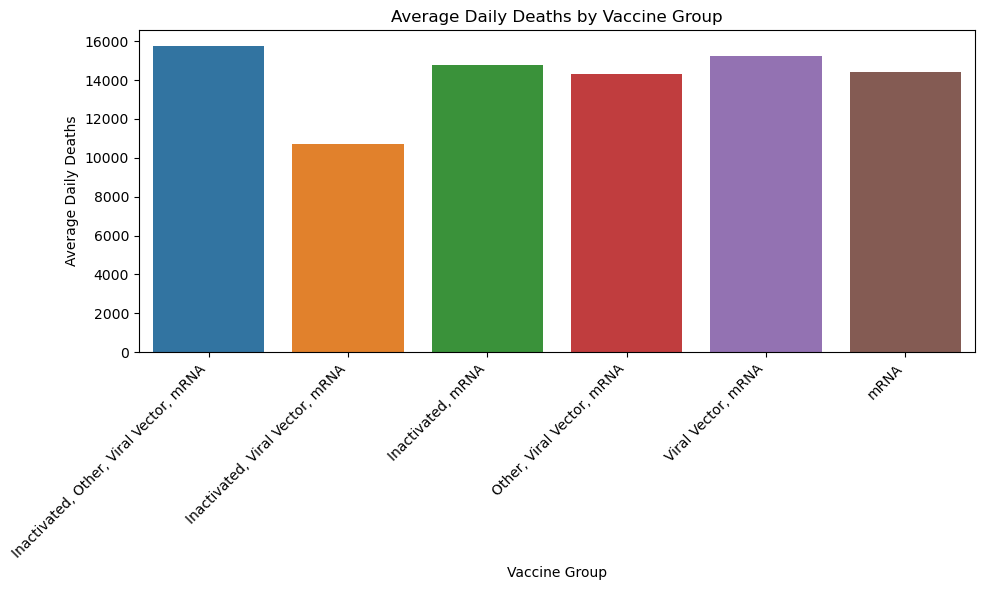

In [62]:
# Code here for Q1

vaccine_death_data = covid_df.groupby(
    'vaccine_group')['daily_deaths'].mean().reset_index()

#Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='vaccine_group', 
            y='daily_deaths', data=vaccine_death_data)
plt.title('Average Daily Deaths by Vaccine Group')
plt.xlabel('Vaccine Group')
plt.ylabel('Average Daily Deaths')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

covid_df['daily_deaths'] = pd.to_numeric(
    covid_df['daily_deaths'], errors='coerce')
covid_df['total_vaccinations_per_hundred'] = pd.to_numeric(
    covid_df['total_vaccinations_per_hundred'], errors='coerce')


### Q2: Does the country of origin influence the sentiment of COVID-19-related tweets?

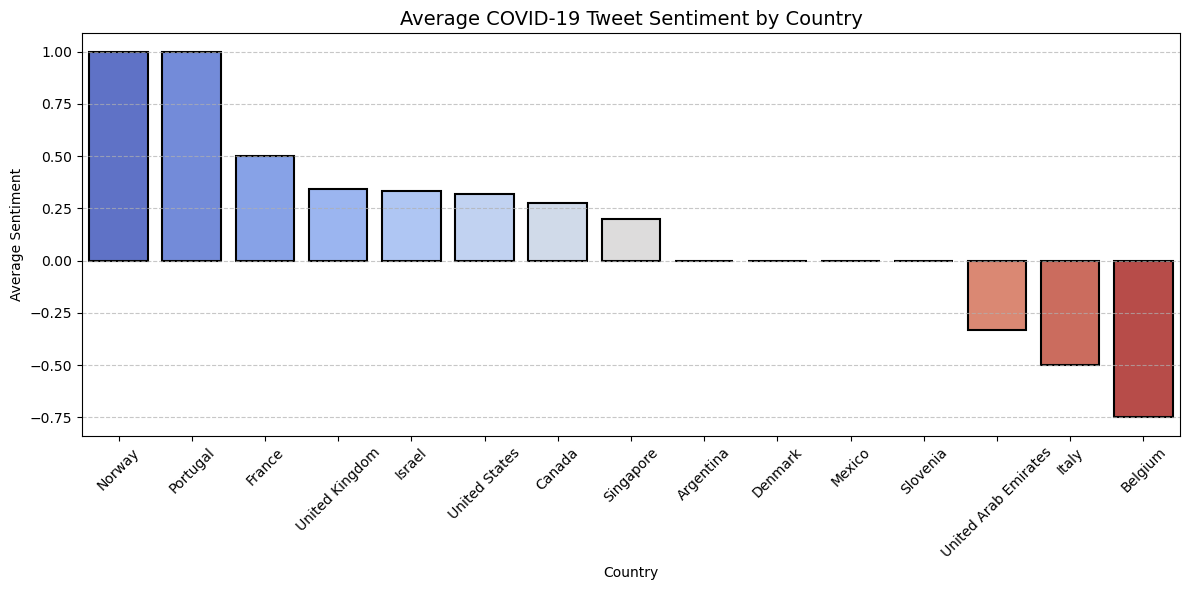

In [65]:
q3 = covid_df.groupby('country')['text_sentiment'].mean().reset_index()
country_sentiment = q3.sort_values(by='text_sentiment', ascending=False)

plt.figure(figsize=(12, 6), dpi=100)  
sns.barplot(
    data=country_sentiment,
    x='country',
    y='text_sentiment',
    palette='coolwarm',
    edgecolor='black',
    linewidth=1.5
)

plt.title('Average COVID-19 Tweet Sentiment by Country', fontsize=14)
plt.xlabel('Country')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## Interpreter: Vincent Lu
(If you do not have a second interpreter, just remove this section)

### Q1: WRITE_QUESTION_HERE

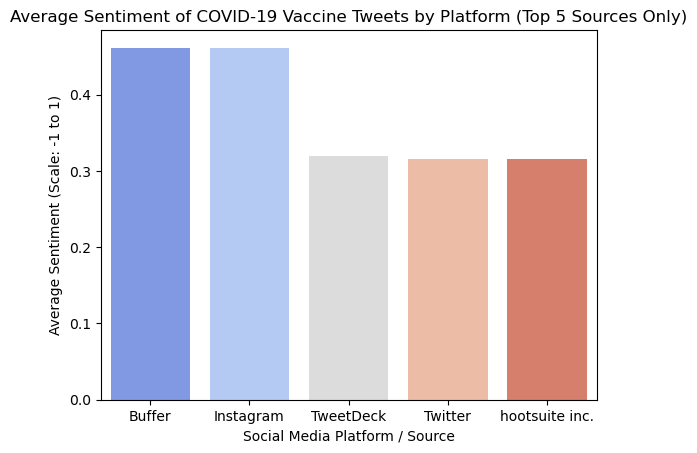

In [69]:
# Code here for Q1
top_5_sources = covid_df['source'].value_counts().head(5).index
#Only using the top 5 sources that showed up in the dataset to prevent overcrowding
top_sources_df = covid_df[covid_df[
'source'].isin(top_5_sources)] 
averge_sentiment_by_source = top_sources_df.groupby(
    'source')['text_sentiment'].mean().reset_index()

plt.figure()
sns.barplot(data=averge_sentiment_by_source, x='source', 
            y='text_sentiment', palette='coolwarm')

plt.title('Average Sentiment of COVID-19 Vaccine Tweets by Platform (Top 5 Sources Only)')
plt.xlabel('Social Media Platform / Source')
plt.ylabel('Average Sentiment (Scale: -1 to 1)')

plt.show()

### Q2: WRITE_QUESTION_HERE

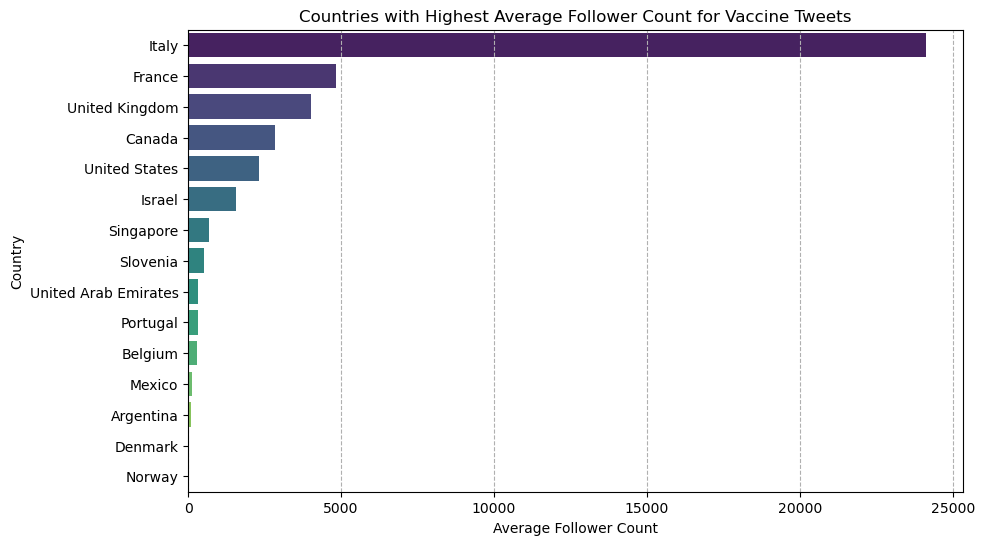

In [72]:
# Code here for Q2
average_followers_by_country = (covid_df.groupby('country')[
                                'user_followers'].mean().reset_index().sort_values(
                                    by='user_followers', ascending=False))

plt.figure(figsize=(10, 6))
sns.barplot(data=average_followers_by_country, x='user_followers', 
            y='country', palette='viridis')

# Set plot title and axis labels
plt.title('Countries with Highest Average Follower Count for Vaccine Tweets')
plt.xlabel('Average Follower Count')
plt.ylabel('Country')
plt.grid(axis='x', linestyle='--')

plt.show()

## Orator: Samir Mohs

### Q1: Do countries with higher vaccination rates exhibit more positive sentiment in social media discussions?

In [76]:
# Code here for Q1

covid_pivot = covid_df.pivot_table(index = ['country',
                                   'total_vaccinations_per_hundred'],
                             columns = 'text_sentiment',
                             aggfunc = 'size', fill_value = 0)
display(covid_pivot)

text_sentiment                                       -1    0    1
country              total_vaccinations_per_hundred              
Argentina            0.42                             0    1    0
Belgium              0.25                             1    0    0
                     0.43                             1    1    0
                     0.62                             1    0    0
Canada               0.85                             0    1    3
                     0.95                             2    2    5
                     1.03                             2    7    5
                     1.11                             3    8   13
                     1.22                             2   14    5
                     1.35                             1    8    2
Denmark              2.29                             0    1    0
                     2.53                             0    1    0
France               0.16                             0    0    1
                     0.22                             0    1    0
                     0.31                             0    0    1
                     0.41                             0    1    1
                     0.53                             1    1    2
                     0.64                             0    0    1
Israel               20.84                            0    0    1
                     25.15                            1    0    1
Italy                1.13                             1    0    0
                     1.56                             0    1    0
Mexico               0.32                             0    1    0
Norway               0.86                             0    0    1
Portugal             0.84                             0    0    1
                     1.19                             0    0    1
Singapore            0.03                             0    0    1
                     0.19                             0    1    0
                     0.28                             1    0    0
                     0.38                             0    1    1
Slovenia             1.82                             0    1    0
United Arab Emirates 10.88                            2    0    1
United Kingdom       4.17                             3   15    6
                     4.50                             0    8   14
                     4.92                            11    9   23
                     5.39                            13   21   31
                     5.90                             5   13   25
United States        3.56                            31   52   66
                     3.89                            18   65   65
                     4.27                            35   98  113
                     4.67                            46  145  182
                     5.06                            81  164  227
                     5.44                            50  116  154

### Q2:  How does the age of a Twitter account (user_since_days) impact tweet sentiment on COVID-19 deaths?

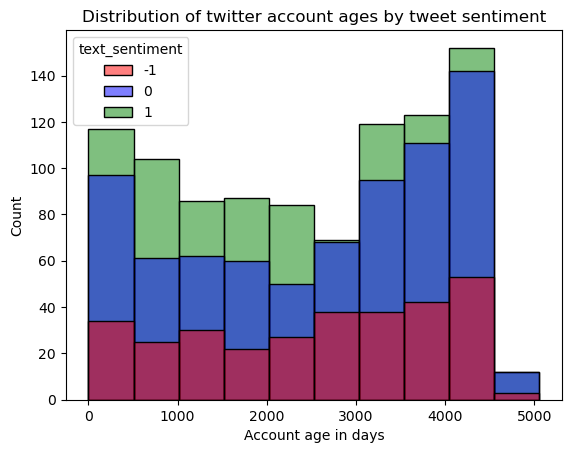

In [79]:
# Code here for Q2
sns.histplot(covid_df, x = 'user_since_days', 
             hue = 'text_sentiment', bins = 10, palette= ['red', 'blue', 'green'])

plt.title("Distribution of twitter account ages by tweet sentiment")
plt.xlabel("Account age in days");

## Deliverer: Nishil Patel

### Q1: Do users tweet more about COVID-19 deaths on days with a higher number of deaths?

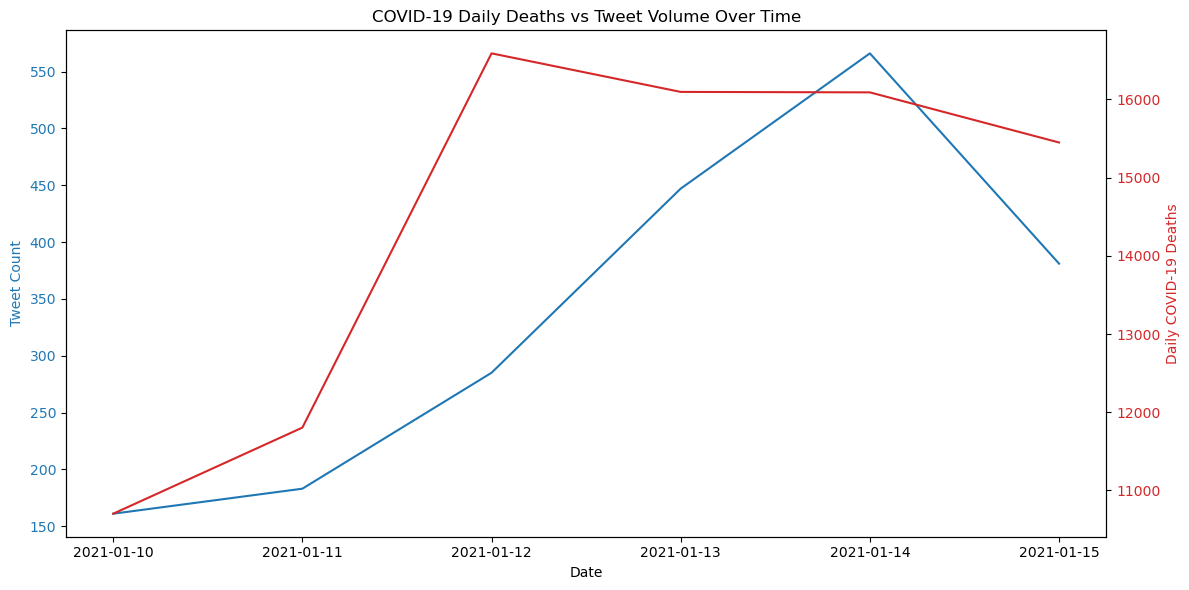

In [83]:
# Code here for Q1
tweets_per_day = covid_df.groupby(
    "Date").size().reset_index(name="tweet_count")

# Extract daily deaths per day
deaths_per_day = covid_df[['Date', 'daily_deaths']].drop_duplicates()

# Merge tweet count with daily deaths
merged = pd.merge(tweets_per_day, deaths_per_day, on='Date')

# Convert Date to datetime format
merged['Date'] = pd.to_datetime(merged['Date'])

# Create time series line plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot tweet count
ax1.plot(merged['Date'], merged['tweet_count'], 
         color='tab:blue', label='Tweet Count')
ax1.set_xlabel('Date')
ax1.set_ylabel('Tweet Count', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Plot daily deaths on secondary axis
ax2 = ax1.twinx()
ax2.plot(merged['Date'], merged['daily_deaths'], 
         color='tab:red', label='Daily Deaths')
ax2.set_ylabel('Daily COVID-19 Deaths', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Title and layout
plt.title('COVID-19 Daily Deaths vs Tweet Volume Over Time')
fig.tight_layout()
plt.show()

### Q2: Did an increase in vaccinated people correlate with a decrease in COVID-19 death rates across different countries?

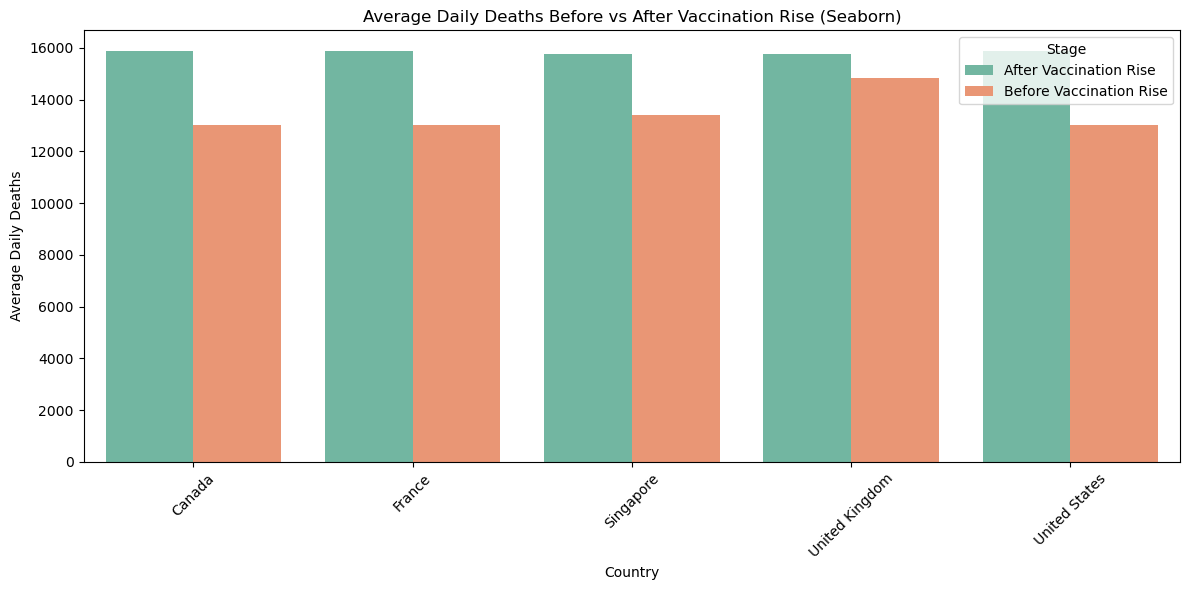

In [86]:
# Code here for Q2
country_daily = covid_df.groupby(['country', 'Date']).agg({
    'daily_deaths': 'mean',
    'total_vaccinations_per_hundred': 'mean'
}).reset_index()

# Filter out countries with too few data points
country_counts = country_daily['country'].value_counts()
valid_countries = country_counts[country_counts >= 4].index
filtered_final = country_daily[
country_daily['country'].isin(valid_countries)]

# Split each country into "Before" and "After" stages using median vax rate
def label_vax_stage(group):
    median_vax = group['total_vaccinations_per_hundred'].median()
    group['vax_stage'] = group['total_vaccinations_per_hundred'].apply(
        lambda x: 'Before Vaccination Rise' if x <= median_vax else 'After Vaccination Rise'
    )
    return group

staged_final = filtered_final.groupby(
    'country').apply(label_vax_stage).reset_index(drop=True)

# Calculate average daily deaths for each stage
avg_deaths = staged_final.groupby([
    'country', 'vax_stage'])['daily_deaths'].mean().reset_index()
avg_deaths.columns = ['Country', 'Stage', 'Average Daily Deaths']

# Plot Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_deaths, x='Country',
            y='Average Daily Deaths', hue='Stage', palette='Set2')

plt.title('Average Daily Deaths Before vs After Vaccination Rise (Seaborn)')
plt.xlabel('Country')
plt.ylabel('Average Daily Deaths')
plt.xticks(rotation=45)
plt.legend(title='Stage')
plt.tight_layout()
plt.show()

## Follow-up Questions

### New Questions Based Off Initial Investigation
- Q1: Can we classify the sentiment of a tweet based on user_followers, user_since_days, and daily_deaths?
- Q2: Can we predict daily COVID-19 deaths using variables total_vaccinations_per_hundred, vaccine_group, country, and source?
- Q3: Can we predict the percent daily increase in deaths using text_sentiment, is_retweet, and total_vaccinations_per_hundred?
- Q4: Can we determine if daily COVID-19 deaths increase after a rise in vaccinations using total_vaccinations_per_hundred, daily_increase_percent, and country?

### Investigation of Follow-up Questions

Our group decided to investigate Q1 and Q2 in further detail.

The first figure shown displays a correlation heatmap of deaths, vaccinations, and social media influences. The second figure below displays the proportion of sentiment by follower count groups, which is grouped by positive, neutral
SHOW AT LEAST 2 TABLES OR FIGURES BELOW THAT EXPLORE ANSWERS FOR THE QUESTIONS YOU ARE INVESTIGATING FURTHER.

[[  2  29  31]
 [ 13  57  74]
 [ 17  73 109]]
              precision    recall  f1-score   support

          -1       0.06      0.03      0.04        62
           0       0.36      0.40      0.38       144
           1       0.51      0.55      0.53       199

    accuracy                           0.41       405
   macro avg       0.31      0.33      0.32       405
weighted avg       0.39      0.41      0.40       405



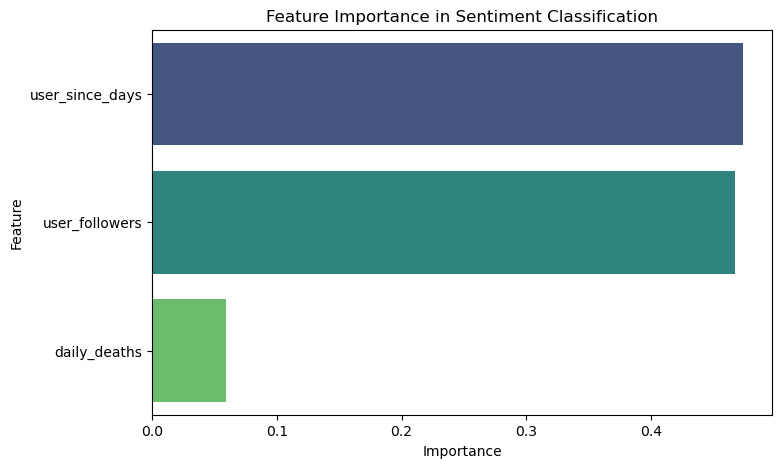

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Features and label
X = covid_df[['user_followers', 'user_since_days', 'daily_deaths']]
y = covid_df['text_sentiment']  # Assuming values like 0, 1, 2

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

importances = clf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance in Sentiment Classification')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

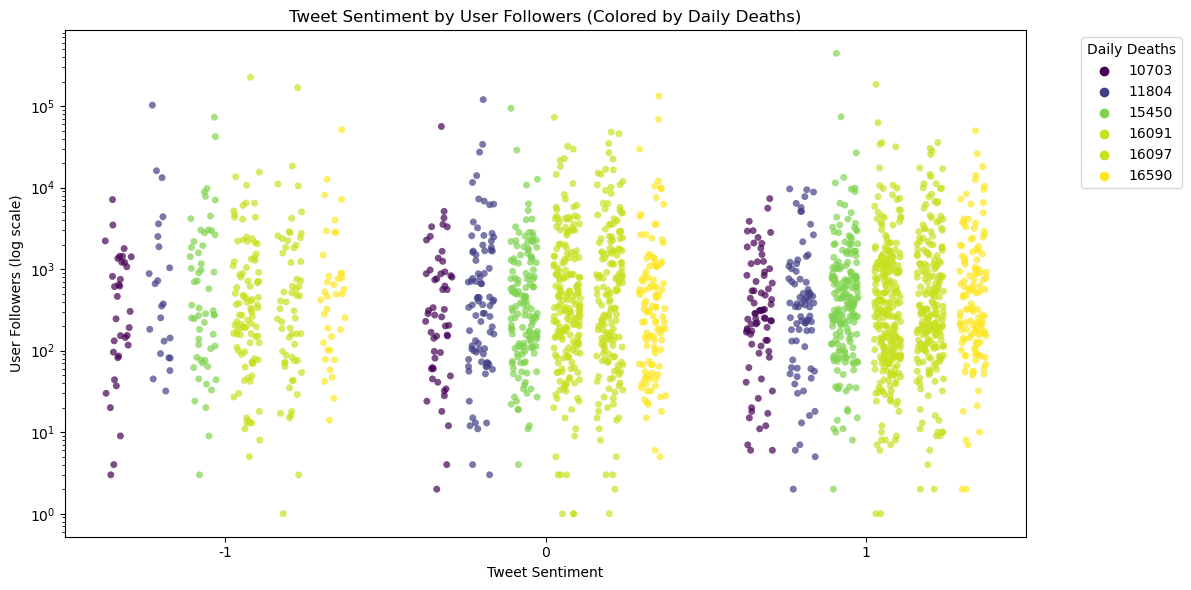

In [91]:
#Code
#Question 1
plt.figure(figsize=(12, 6))
sns.stripplot(data=covid_df,
              x='text_sentiment',
              y='user_followers',
              hue='daily_deaths',
              palette='viridis',
              dodge=True,
              alpha=0.7,
              jitter=0.25)
plt.yscale('log')  # log scale helps handle large differences in follower count
plt.title('Tweet Sentiment by User Followers (Colored by Daily Deaths)')
plt.xlabel('Tweet Sentiment')
plt.ylabel('User Followers (log scale)')
plt.legend(title='Daily Deaths', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Summary










In [94]:
covid_df['text_sentiment'] = covid_df['text_sentiment'].astype('category')
covid_df['user_verified'] = covid_df['user_verified'].astype(int)
X = covid_df[['daily_increase_percent', 'daily_vaccinations',
'user_verified', 'user_since_days']]
y = covid_df['text_sentiment'] # -1, 0, 1
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)
# Model training
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
# Predictions
y_pred = clf.predict(X_test)
# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# Feature Importance
importances = clf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance':
importances}).sort_values(
by='Importance', ascending=False)
# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importance in Sentiment Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

KeyError: "['daily_vaccinations'] not in index"

In [ ]:
covid_df['text_sentiment'] = covid_df['text_sentiment'].astype('category')
covid_df['user_verified'] = covid_df['user_verified'].astype(int)

# Feature and target setup
X = covid_df[['daily_increase_percent', 'daily_vaccinations', 'user_verified', 'user_since_days']]
y = covid_df['text_sentiment']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline model - DummyClassifier
baseline_clf = DummyClassifier(strategy='most_frequent', random_state=42)
baseline_clf.fit(X_train, y_train)

# Predictions
y_pred_baseline = baseline_clf.predict(X_test)

# Evaluation
print("Confusion Matrix (Baseline):")
print(confusion_matrix(y_test, y_pred_baseline))

print("\nClassification Report (Baseline):")
print(classification_report(y_test, y_pred_baseline))